In [ ]:
import pandas as pd

# Assuming the data is downloaded and extracted (housing.csv exists)
filepath = "/content/housing.csv"  # Replace with the actual filename if different

# Read the CSV data into a DataFrame
housing_data = pd.read_csv(filepath)

# Explore the data using pandas methods (e.g., head(), info(), describe())
print(housing_data.head())  # Display the first few rows


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [19]:
import os
import urllib.request
import pandas as pd
import requests
from io import StringIO

def download_and_extract_file(file_url, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    filename, file_extension = os.path.splitext(os.path.basename(file_url))
    output_file_path = os.path.join(output_dir, filename)

    urllib.request.urlretrieve(file_url, output_file_path)

    if file_extension in (".tar", ".gz", ".bz2", ".tgz"):
        with tarfile.open(output_file_path) as tarfile:
            tarfile.extractall(path=output_dir)
    else:
        print(f"File '{filename}' does not appear to be compressed. Skipping extraction.")

def fetch_and_load_housing_data(url="https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"):
    response = requests.get(url)
    if response.status_code == 200:
        data = response.content.decode('utf-8')
        housing_df = pd.read_csv(StringIO(data), header=0)
        return housing_df
    else:
        raise Exception(f"Error downloading data from {url}: Status code {response.status_code}")

try:
    housing_data = fetch_and_load_housing_data()
    print(housing_data.head())  # Display the first few rows
except Exception as e:
    print(f"An error occurred: {e}")


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [ ]:
# Assuming you have loaded your data into housing_data

# Get the top 5 rows
top_5_rows = housing_data.head()

# Print the top 5 rows
print(top_5_rows)


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [ ]:
# Assuming you have loaded your data into housing_data

# Get data info
data_info = housing_data.info()

# Print data info
print(data_info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [ ]:
# Assuming you have loaded your data into housing_data

# Get the counts of each category in "ocean_proximity"
ocean_proximity_counts = housing_data['ocean_proximity'].value_counts()

# Print the counts
print(ocean_proximity_counts)


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


In [22]:
# Assuming you have loaded your data into housing_data

# Get summary of the numerical attributes
numerical_summary = housing_data.describe()

# Print the summary
print(numerical_summary)


          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

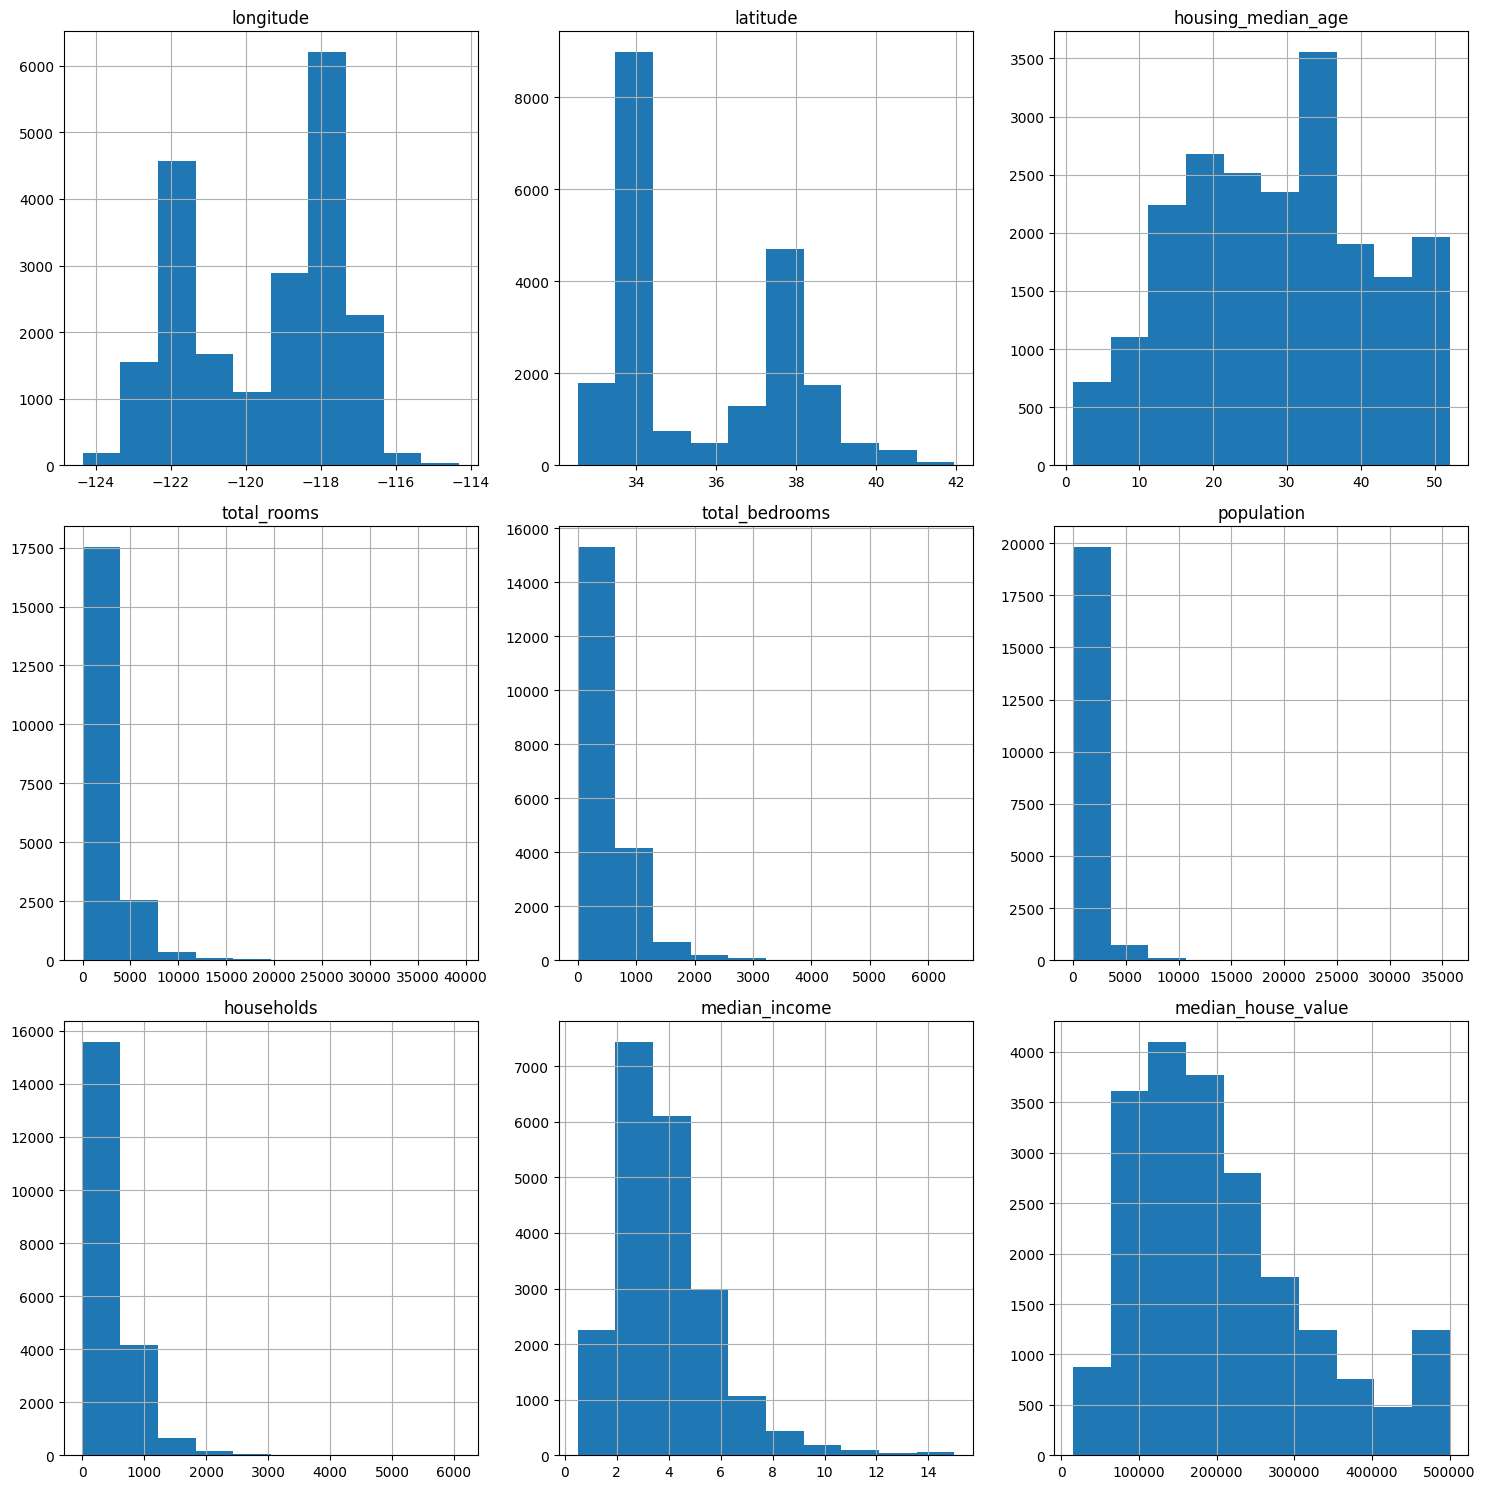

In [37]:
import matplotlib.pyplot as plt

housing = pd.read_csv('housing.csv')

# عدد الصفوف والأعمدة لعرض الرسوم البيانية
num_rows = 3
num_cols = 3

# إنشاء الشكل والمحاور
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
housing_ordered = housing[column_order]

# رسم الهوستوغرام لكل عمود
for i, ax in enumerate(axes.flat):
    if i < len(housing.columns):
        housing.hist(column=housing.columns[i], ax=ax)
        ax.set_title(housing.columns[i])

    else:
        ax.axis('off')

plt.tight_layout()
plt.show()


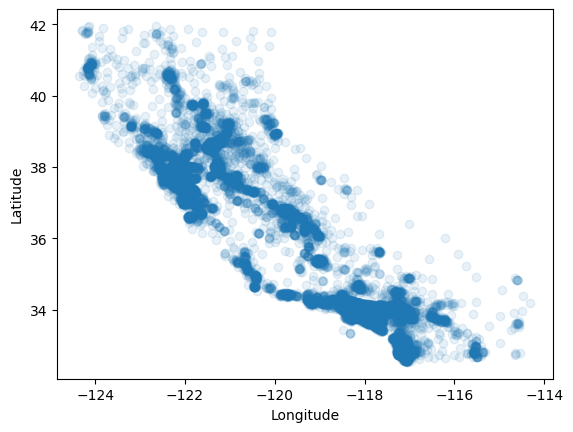

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd  # Assuming you have your data in a pandas DataFrame

# Replace 'data.csv' with the actual path to your CSV file (if applicable)
data_frame = pd.read_csv('housing.csv')

# Extract longitude and latitude data
longitude = data_frame['longitude']
latitude = data_frame['latitude']

# Create the scatter plot
plt.scatter(longitude, latitude, alpha=0.1)  # Set alpha to 0.1 for transparency

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Display the plot
plt.show()


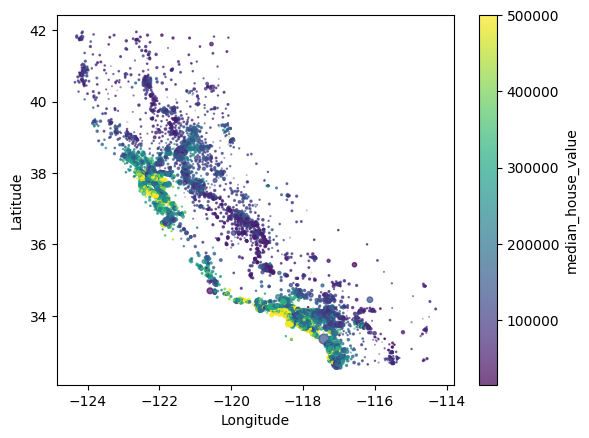

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is loaded into a DataFrame named 'data_frame'
# Make sure the columns 'population' and 'price' are numerical

# Extract data
longitude = data_frame['longitude']
latitude = data_frame['latitude']
population = data_frame['population']  # Assuming this column represents population
price = data_frame['median_house_value']  # Assuming this column represents price

# Normalize population for circle radius (optional)
# This ensures circles with larger populations have proportionally larger radii
population_scaled = population / population.max()

# Create the scatter plot with custom arguments
plt.scatter(longitude, latitude, s=population_scaled * 50, c=price, cmap='viridis', alpha=0.7 )  # Adjust parameters as needed

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Optional: Add colorbar for price
plt.colorbar(label='median_house_value')

# Display the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data_frame = pd.read_csv('housing.csv')

# Select only continuous numeric columns (excluding the non-numeric column)
numeric_columns = data_frame.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation = numeric_columns.corr()

# Display correlation matrix (optional)
print(correlation.to_string())


                    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value
longitude            1.000000 -0.924664           -0.108197     0.044568        0.069608    0.099773    0.055310      -0.015176           -0.045967
latitude            -0.924664  1.000000            0.011173    -0.036100       -0.066983   -0.108785   -0.071035      -0.079809           -0.144160
housing_median_age  -0.108197  0.011173            1.000000    -0.361262       -0.320451   -0.296244   -0.302916      -0.119034            0.105623
total_rooms          0.044568 -0.036100           -0.361262     1.000000        0.930380    0.857126    0.918484       0.198050            0.134153
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380        1.000000    0.877747    0.979728      -0.007723            0.049686
population           0.099773 -0.108785           -0.296244     0.857126        0.877747    1.000000    0.907222

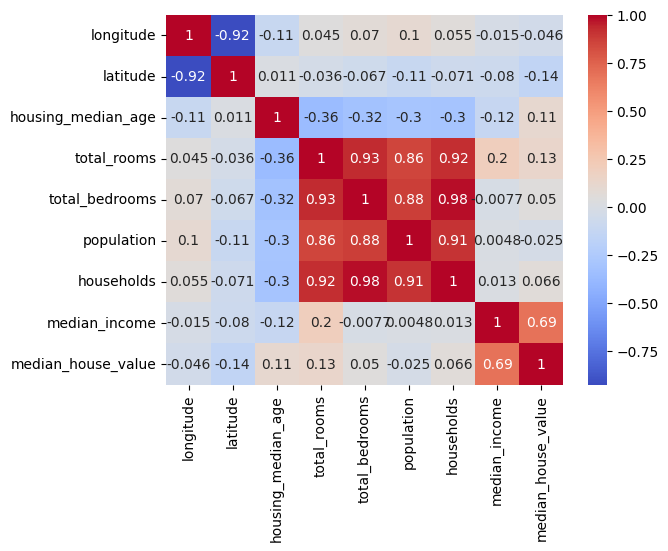

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_frame = pd.read_csv('housing.csv')

# Select only continuous numeric columns (excluding the non-numeric column)
numeric_columns = data_frame.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation = numeric_columns.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation, annot=True, cmap='coolwarm')  # Adjust 'cmap' for colormap preference
plt.show()


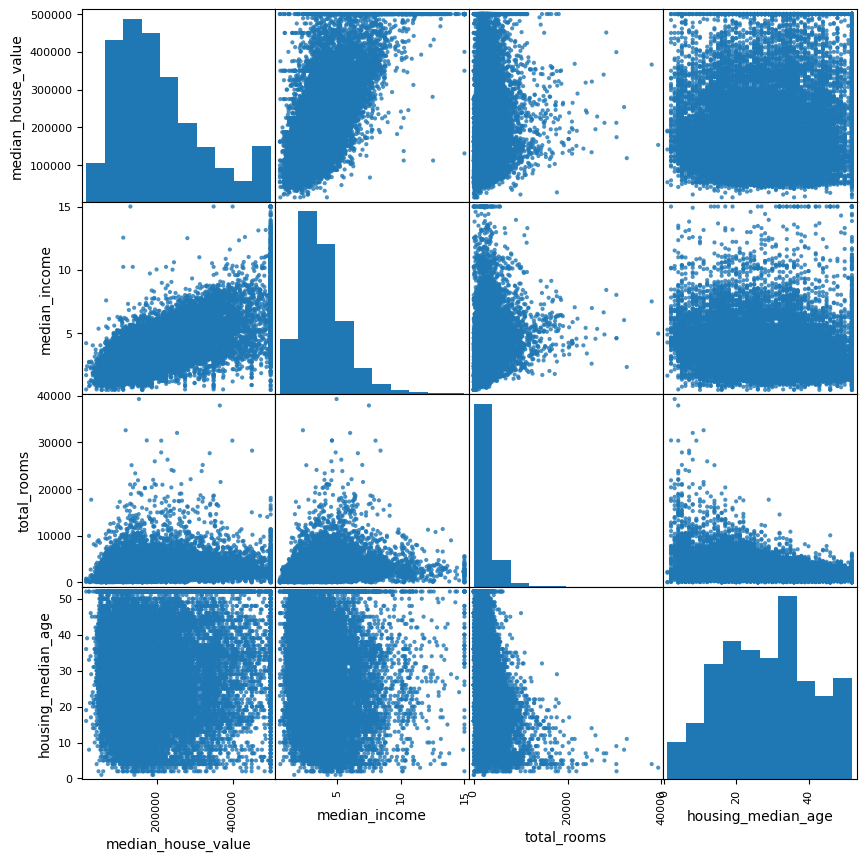

In [ ]:
import pandas as pd
from pandas.plotting import scatter_matrix

# Assuming your data is loaded into a DataFrame named 'data_frame'
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

# Create the scatter matrix
scatter_matrix(data_frame[attributes], alpha=0.8, figsize=(10, 10), diagonal='hist')
plt.show()


NameError: name 'plt' is not defined

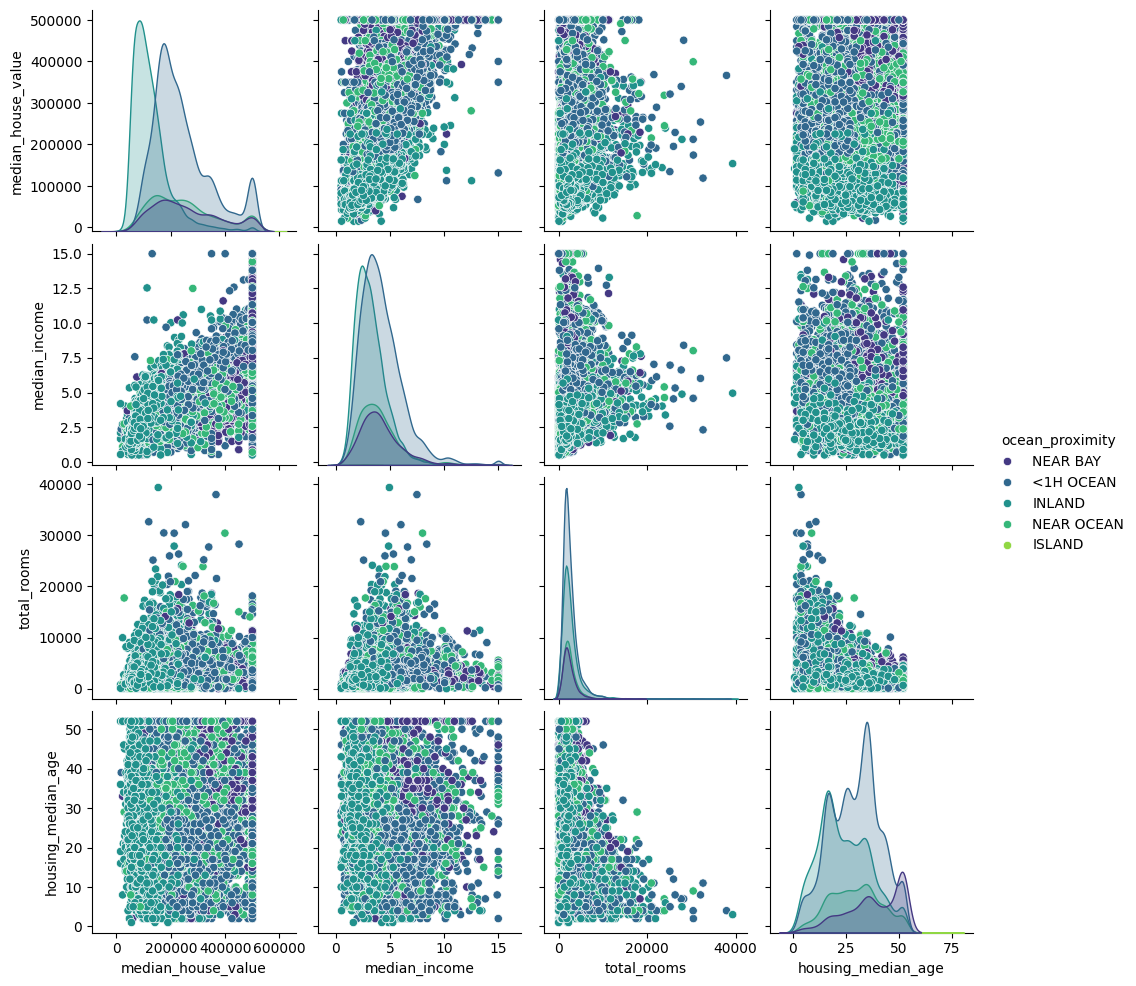

In [16]:
import seaborn as sns
import pandas as pd

data_frame = pd.read_csv('housing.csv')
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age", "ocean_proximity"]

# Create the scatter matrix with color based on ocean_proximity
sns.pairplot(data_frame[attributes], hue="ocean_proximity", palette='viridis')
plt.show()


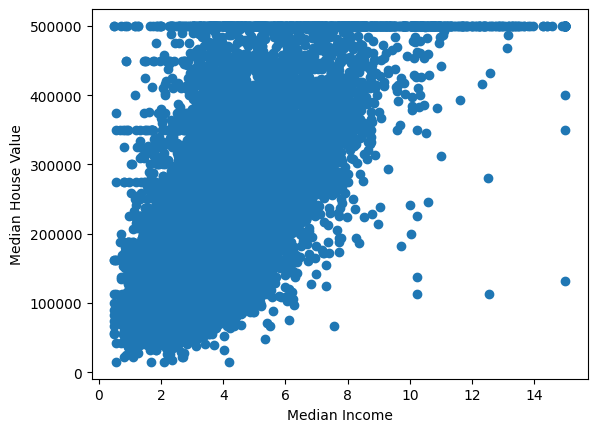

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

data_frame = pd.read_csv('housing.csv')

# Extract data
median_income = data_frame['median_income']
median_house_value = data_frame['median_house_value']

# Create scatter plot
plt.scatter(median_income, median_house_value)

# Add labels and title
plt.xlabel('Median Income')
plt.ylabel('Median House Value')

# Display plot
plt.show()


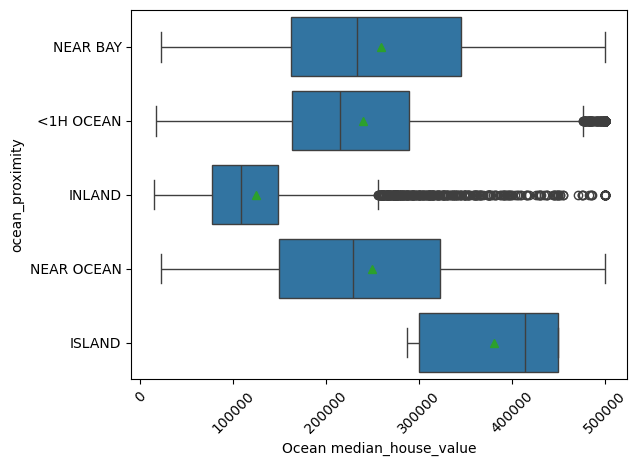

In [ ]:
import seaborn as sns
import pandas as pd

data_frame = pd.read_csv('housing.csv')

# Create a box plot of median_house_value grouped by ocean_proximity
sns.boxplot(
    x = "median_house_value",
    y = "ocean_proximity",
    showmeans=True,  # Show mean value within each box
    data=data_frame
)

# Rotate x labels to prevent overlapping (optional)
plt.xticks(rotation=45)  # Adjust rotation angle as needed

# Add title and labels
plt.xlabel('Ocean median_house_value')
plt.ylabel('ocean_proximity')

# Display plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np

np.random.seed(2)
df = pd.read_csv('housing.csv')

# Create a Series showing the total count of missing values per column
missing_values = df.isna().sum()

# Print the Series
print(missing_values)


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [ ]:
import pandas as pd

df = pd.read_csv('housing.csv')

# Check for zeros and count them
zero_counts = (df == 0).sum(axis=0)

# Print the results
print(zero_counts)


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [ ]:
import pandas as pd

data_frame = pd.read_csv('housing.csv')

# Select numerical columns only (assuming 'ocean_proximity' is the string column)
numerical_columns = df.select_dtypes(include=[np.number])

# Calculate correlation matrix using only numerical columns
correlation_matrix = numerical_columns.corr()

# Print the correlation matrix
print(correlation_matrix)


                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

In [ ]:
import pandas as pd

housing = pd.read_csv('housing.csv')

housing_cat = pd.DataFrame(housing['ocean_proximity'])

print(housing["ocean_proximity"].unique())


['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [ ]:
from sklearn.preprocessing import OneHotEncoder

housing = pd.read_csv('housing.csv')

# Create an instance of OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # Set sparse=False for easier handling

# Fit the encoder to the categorical data
encoder.fit(housing_cat)

# Transform the categorical data into one-hot encoded features
housing_cat_encoded = encoder.transform(housing_cat)

# Print the transformed data (optional)
print(housing_cat_encoded)


[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [ ]:
from sklearn.preprocessing import StandardScaler

housing = pd.read_csv('housing.csv')

# Extract numerical features
housing_num = housing.drop("ocean_proximity", axis=1)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(housing_num)

# Transform the data using the fitted scaler
housing_num_scaled = scaler.transform(housing_num)

# Print the scaled data (optional)
print(housing_num_scaled)


[[-1.32783522  1.05254828  0.98214266 ... -0.97703285  2.34476576
   2.12963148]
 [-1.32284391  1.04318455 -0.60701891 ...  1.66996103  2.33223796
   1.31415614]
 [-1.33282653  1.03850269  1.85618152 ... -0.84363692  1.7826994
   1.25869341]
 ...
 [-0.8237132   1.77823747 -0.92485123 ... -0.17404163 -1.14259331
  -0.99274649]
 [-0.87362627  1.77823747 -0.84539315 ... -0.39375258 -1.05458292
  -1.05860847]
 [-0.83369581  1.75014627 -1.00430931 ...  0.07967221 -0.78012947
  -1.01787803]]


In [4]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

housing = pd.read_csv('housing.csv')
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_reader = CombinedAttributesAdder(add_bedrooms_per_room=True)

housing_extra_attribs = attr_reader.transform(housing.values)
#extra_attribs_names = ["rooms_per_household", "population_per_household", "bedrooms_per_room"]
#all_columns = list(housing.columns) + extra_attribs_names
#housing_extra_attribs_df = pd.DataFrame(housing_extra_attribs, columns=all_columns)

print(housing_extra_attribs)



[[-122.23 37.88 41.0 ... 6.984126984126984 2.5555555555555554
  0.14659090909090908]
 [-122.22 37.86 21.0 ... 6.238137082601054 2.109841827768014
  0.15579659106916466]
 [-122.24 37.85 52.0 ... 8.288135593220339 2.8022598870056497
  0.12951601908657123]
 ...
 [-121.22 39.43 17.0 ... 5.20554272517321 2.325635103926097
  0.21517302573203195]
 [-121.32 39.43 18.0 ... 5.329512893982808 2.1232091690544412
  0.21989247311827956]
 [-121.24 39.37 16.0 ... 5.254716981132075 2.616981132075472
  0.22118491921005387]]


In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
housing_num = (housing.columns)

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])


In [14]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
housing = pd.read_csv('housing.csv')
# تحديد السمات الرقمية والفئوية
num_attribs = list(housing.select_dtypes(include=[np.number]).columns)
cat_attribs = ["ocean_proximity"]

# تعريف خط الأنابيب الكامل بشكل منفصل للسمات الرقمية والفئوية
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),  # معالجة القيم المفقودة باستخدام الوسيط
    ('attribs_adder', CombinedAttributesAdder()),   # إضافة السمات المدمجة
    ('std_scaler', StandardScaler()),               # توحيد الميزات
])

cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder()),  # تحويل الفئات إلى تصفيفات ثنائية
])

# دمج خطوط الأنابيب الفرعية في خط أنابيب كامل باستخدام ColumnTransformer
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),  # للسمات الرقمية
    ("cat", cat_pipeline, cat_attribs),  # للسمات الفئوية
])
# تدريب وتحويل البيانات باستخدام خط الأنابيب الكامل
housing_prepared = full_pipeline.fit_transform(housing)
print(housing_prepared[:5])

[[-1.32783522  1.05254828  0.98214266 -0.8048191  -0.97247648 -0.9744286
  -0.97703285  2.34476576  2.12963148  0.62855945 -0.04959654 -1.02998783
   0.          0.          0.          1.          0.        ]
 [-1.32284391  1.04318455 -0.60701891  2.0458901   1.35714343  0.86143887
   1.66996103  2.33223796  1.31415614  0.32704136 -0.09251223 -0.8888972
   0.          0.          0.          1.          0.        ]
 [-1.33282653  1.03850269  1.85618152 -0.53574589 -0.82702426 -0.82077735
  -0.84363692  1.7826994   1.25869341  1.15562047 -0.02584253 -1.29168566
   0.          0.          0.          1.          0.        ]
 [-1.33781784  1.03850269  1.85618152 -0.62421459 -0.71972345 -0.76602806
  -0.73378144  0.93296751  1.16510007  0.15696608 -0.0503293  -0.4496128
   0.          0.          0.          1.          0.        ]
 [-1.33781784  1.03850269  1.85618152 -0.46240395 -0.61242263 -0.75984669
  -0.62915718 -0.012881    1.17289952  0.3447108  -0.08561576 -0.63908657
   0.      

In [15]:
from sklearn.model_selection import train_test_split

housing_prepared = full_pipeline.fit_transform(housing)
train_set, test_set = train_test_split(housing_prepared, test_size=0.2, random_state=42)

